<font size="10">Zadanie 1</font>

Celem jest zbudowanie modelu, który będzie w stanie poprawnie przewidywać, jaką cyfrę przedstawia obraz, korzystając z maszyny wektorów nośnych (SVM).

Wykorzystamy do tego zbiór digits z biblioteki scikit-learn<br>
**Cel**: Klasyfikacja cyfr od 0 do 9 na podstawie ich obrazu.

**Charakterystyka**:<br>
Liczba Prób: 1797 obrazów.<br>
Rozdzielczość: Każdy obraz jest w skali szarości i ma wymiary 8x8 pikseli.<br>
Cechy: Każdy obraz jest reprezentowany przez macierz 8x8 pikseli, która jest spłaszczana do jednowymiarowego wektora o długości 64 elementów.
Etykiety (Target): Etykiety reprezentują cyfry od 0 do 9.




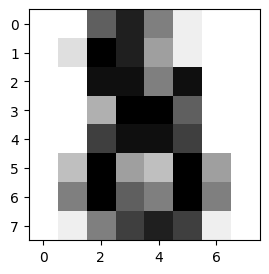

In [3]:
#Najpierw żebyśmy wiedzieli z czym mamy do czynienia wyświetlamy przykładowy obraz
import matplotlib.pyplot as plt

from sklearn import datasets

# Pobieramy dane z scikit-leatn
digits = datasets.load_digits()

# Wywietlamy przykladowy obraz
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

<font size="5">Teraz przystępujemy do załadowania zbioru danych i wykorzystania SVM do określania predykcji</font>


<Figure size 640x480 with 0 Axes>

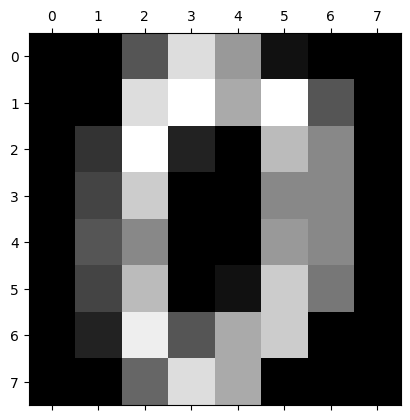

Dokładność modelu: 0.9870
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        60
           5       1.00      0.98      0.99        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [6]:
# Importowanie bibliotek
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Załadowanie zbioru danych digits
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Wyświetlenie przykładowego obrazu
plt.gray()
plt.matshow(digits.images[0])
plt.show()

# Podział zbioru na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicjalizacja modelu SVM (kernel='rbf' dla jądra radialnego)
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Trenowanie modelu na danych treningowych
model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy:.4f}')
print('Raport klasyfikacji:')
print(classification_report(y_test, y_pred))

<font size="5">Wylosujemy losowe zdjęcie i spróbujemy przewidzieć jaka jest na nim cyfra</font>


<Figure size 640x480 with 0 Axes>

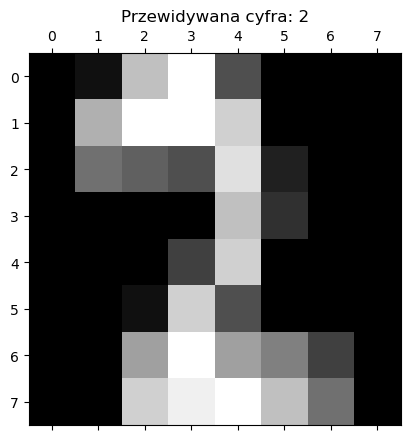

In [12]:
import numpy as np
# Wybranie losowego obrazu ze zbioru testowego
random_idx = np.random.randint(len(X_test))
random_image = X_test[random_idx].reshape(8, 8)

# Przewidywanie wartości cyfry na tym obrazie
predicted_value = model.predict([X_test[random_idx]])[0]

# Wyświetlanie obrazu z przewidywaną wartością
plt.gray()
plt.matshow(random_image)
plt.title(f'Przewidywana cyfra: {predicted_value}')
plt.show()

<font size="10">Zadanie 2</font> <br>
Podobnym zadaniem, również na obrazach, ale bardziej wymagającym niż klasyfikacja cyfr, jest klasyfikacja odręcznych rysunków z zestawu danych MNIST Fashion. <br> Jest to popularny zestaw danych, który zawiera obrazy odzieży i można go wykorzystać do zbudowania klasyfikatora SVM.

**Nazwa**: Fashion MNIST 

**Źródło**: Kolekcja zebrana przez Zalando Research, dostępna w bibliotece tensorflow i keras.

**Cel**: Klasyfikacja rysunków odzieży na 10 kategorii. <br>
**Charakterystyka**: <br>
**Liczba Prób**: 70,000 obrazów. <br>
**Rozdzielczość**: Każdy obraz ma wymiary 28x28 pikseli. <br>
**Cechy**: Każdy obraz reprezentowany przez jednowymiarowy wektor o długości 784 (28*28) elementów. <br>
**Etykiety**: 10 klas produktów modowych <br>




In [ ]:
#Najpierw zainstalujmy tensorflow aby zaciągnąć z niego dane

In [20]:
!pip install tensorflow

In [19]:
# Importowanie bibliotek
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Załadowanie zbioru danych Fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalizacja danych (skalowanie pikseli do zakresu [0, 1])
# Wartości pikseli obrazów w skali szarości mają zakres od 0 do 255, gdzie: 0 to czarny a 255 to biały, stąd dzielimy na 255
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Spłaszczanie obrazów z 28x28 do jednowymiarowego wektora
X_train = X_train_full.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Podział danych treningowych na treningowy i walidacyjny
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_full, test_size=0.2, random_state=42)

# Tworzenie modelu SVM z jądrem RBF
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

# Trenowanie modelu na danych treningowych
model.fit(X_train, y_train)

# Przewidywanie na zbiorze walidacyjnym
y_pred = model.predict(X_val)

# Ocena modelu
accuracy = accuracy_score(y_val, y_pred)
print(f'Dokładność modelu na zbiorze walidacyjnym: {accuracy:.4f}')
print('Raport klasyfikacji:')
print(classification_report(y_val, y_pred))


ModuleNotFoundError: No module named 'distutils'

<Figure size 640x480 with 0 Axes>

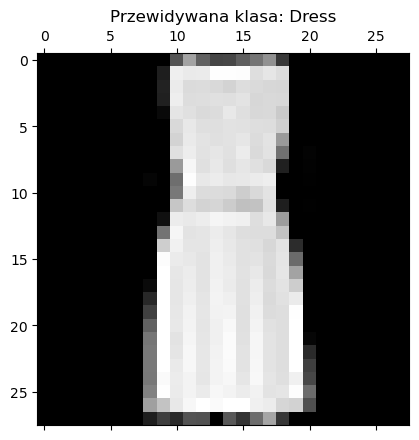

In [24]:
# Wybranie losowego obrazu ze zbioru testowego
random_idx = np.random.randint(len(X_test))
random_image = X_test[random_idx].reshape(28, 28)

# Przewidywanie wartości klasy na tym obrazie
predicted_value = model.predict([X_test[random_idx].ravel()])[0]

# Lista nazw kategorii
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Wyświetlanie obrazu z przewidywaną wartością
plt.gray()
plt.matshow(random_image)
plt.title(f'Przewidywana klasa: {class_names[predicted_value]}')
plt.show()

<font size="10">Zadanie 3</font> <br>
Podobnym zadaniem, również na obrazach, ale bardziej wymagającym niż klasyfikacja cyfr, jest klasyfikacja odręcznych rysunków z zestawu danych MNIST Fashion. <br> Jest to popularny zestaw danych, który zawiera obrazy odzieży i można go wykorzystać do zbudowania klasyfikatora SVM.

**Nazwa**: MNIST

**Źródło**: Kolekcja zebrana przez Zalando Research, dostępna w bibliotece tensorflow i keras.

**Cel**: Klasyfikacja rysunków odzieży na 10 kategorii. <br>
**Charakterystyka**: <br>
**Rozdzielczość**: Każdy obraz ma 28x28 pikseli. <br>
**Cechy**: Skala szarości (1 kanał). <br>
**Etykiety**: 10 klas (cyfry 0-9). <br>


Zbiór Danych "MNIST" - Klasyfikacja Ręcznie Pisanych Cyfr

In [1]:
# Importowanie bibliotek
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist

## Załadowanie zbioru danych MNIST


## Normalizacja danych (skalowanie pikseli do zakresu [0, 1]) trzeba będzie dzielić na 255


## Spłaszczanie obrazów z 28x28 do jednowymiarowego wektora (784 cechy)


## Podział danych treningowych na treningowy i walidacyjny

## Tworzenie modelu SVM z jądrem RBF

## Trenowanie modelu na danych treningowych

## Przewidywanie na zbiorze walidacyjnym

## Ocena modelu


<Figure size 640x480 with 0 Axes>

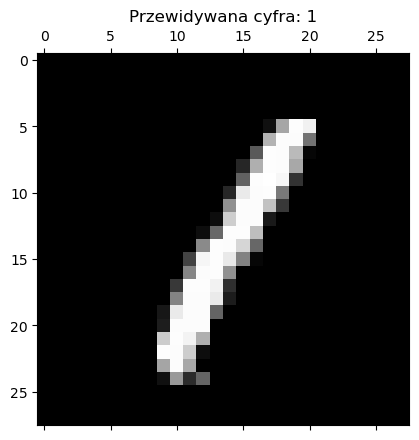

In [33]:
## Wybranie losowego obrazu ze zbioru testowego
random_idx = np.random.randint(len(X_test))
random_image = X_test[random_idx].reshape(28, 28)

## Przewidywanie wartości klasy na tym obrazie

## Wyświetlanie obrazu z przewidywaną wartością
